<a href="https://colab.research.google.com/github/alendoko/bina/blob/main/LB1/CODE/SuperStore_NYC_Weather_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Integration von Superstore-Daten mit Wetterdaten
In diesem Notebook integrieren wir den **Sample Superstore Datensatz** mit Wetterdaten, um zu analysieren, wie sich Wetterbedingungen auf den Umsatz und Gewinn auswirken.

**Datenquellen:**
- Sample Superstore Dataset (Verkaufsdaten)
- Wetterdaten von Kaggle (Global Daily Climate Data)

### 🔍 Fragestellungen:
1. **Beeinflusst das Wetter den Umsatz?**
2. **Gibt es Regionen, die bei bestimmten Wetterbedingungen mehr verkaufen?**
3. **Wie verändert sich der Umsatz in Abhängigkeit von der Temperatur?**

## 📂 1. Bibliotheken importieren
Wir laden die notwendigen Bibliotheken für Datenverarbeitung und Analyse.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from google.colab import data_table

# Matplotlib-Style setzen
plt.style.use('ggplot')

## 🌦️ 2. Wetterdaten vorbereiten
Hier benutzen wir disen Datensatz:
https://www.kaggle.com/datasets/aadimator/nyc-weather-2016-to-2022
Wir haben es etwas gefiltert (nur 2016 und 2017 und nur den Wert für 12:00 Uhr Mittag genommen)

In [118]:
# prompt: bitte lade folgende daten https://raw.githubusercontent.com/alendoko/bina/refs/heads/main/LB1/DATA/NYC_Weather_2016_2017_noon.csv in ein dataframe names df_weather_nyc

import pandas as pd

# Download the file
!wget https://raw.githubusercontent.com/alendoko/bina/refs/heads/main/LB1/DATA/NYC_Weather_2016_2017_noon.csv

# Load the data into a pandas DataFrame
df_weather_nyc = pd.read_csv('NYC_Weather_2016_2017_noon.csv')

# Display the first few rows of the DataFrame (optional)
#print(df_weather_nyc.head())
#print(df_weather_nyc.info())

--2025-02-13 16:41:47--  https://raw.githubusercontent.com/alendoko/bina/refs/heads/main/LB1/DATA/NYC_Weather_2016_2017_noon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50916 (50K) [text/plain]
Saving to: ‘NYC_Weather_2016_2017_noon.csv.3’

NYC_Weather_2016_20 100%[===================>]  49.72K  --.-KB/s    in 0.001s  

2025-02-13 16:41:47 (45.5 MB/s) - ‘NYC_Weather_2016_2017_noon.csv.3’ saved [50916/50916]



In [119]:
# prompt: bitte verwandle die time Kolonne in Datum und Zeit um, benutze dabei df_weather_nyc

# Convert 'time' column to datetime objects
df_weather_nyc['time'] = pd.to_datetime(df_weather_nyc['time'])

# Display the updated DataFrame info
print(df_weather_nyc.info())
print(df_weather_nyc.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   731 non-null    datetime64[ns]
 1   temperature_2m (°C)    731 non-null    float64       
 2   precipitation (mm)     731 non-null    float64       
 3   rain (mm)              731 non-null    float64       
 4   cloudcover (%)         731 non-null    float64       
 5   cloudcover_low (%)     731 non-null    float64       
 6   cloudcover_mid (%)     731 non-null    float64       
 7   cloudcover_high (%)    731 non-null    float64       
 8   windspeed_10m (km/h)   731 non-null    float64       
 9   winddirection_10m (°)  731 non-null    float64       
 10  hour                   731 non-null    int64         
 11  year                   731 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 68.7 KB

## 🌦️ 2.1 Wetterdaten noch weiter filtern und erweitern
Hier behlaten wir nur noch die kolonnen time und temp (früher temperature_2m)

In [120]:
# prompt: hier nehmen wir df_weather_nyc und filtern so das nur die kolonnen time, temperature_2m und cloudcover bleiben, danach sollst du zwei kolonnen umbenennen temperature_2m -> temp und cloudcover -> cloud, das neue dataframe kommt in df_weather_nyc_short

df_weather_nyc_short = df_weather_nyc[['time', 'temperature_2m (°C)', 'cloudcover_low (%)']].copy()
df_weather_nyc_short = df_weather_nyc_short.rename(columns={'temperature_2m (°C)': 'temp', 'cloudcover_low (%)': 'cloud'})


df_weather_nyc_short.info()
data_table.DataTable(df_weather_nyc_short)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    731 non-null    datetime64[ns]
 1   temp    731 non-null    float64       
 2   cloud   731 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.3 KB


,time,temp,cloud
0,2016-01-01 12:00:00,4.8,56.0
1,2016-01-02 12:00:00,0.5,0.0
2,2016-01-03 12:00:00,0.3,0.0
3,2016-01-04 12:00:00,0.1,60.0
4,2016-01-05 12:00:00,-10.1,0.0
...,...,...,...
726,2017-12-27 12:00:00,-6.4,0.0
727,2017-12-28 12:00:00,-10.1,21.0
728,2017-12-29 12:00:00,-10.7,0.0
729,2017-12-30 12:00:00,-8.4,4.0


In [121]:
# prompt: erweitere den df_weather_nyc_short dataframe mit einer zusätlichen kolonne weather die entweder sunny oder cloudy ist aufgrund von der cloud kolonne. Wenn cloud>40 dann soll cloudy stehen sonnst cloudy, benutze den frame von vorhin

# Create the 'weather' column based on the 'cloud' column
df_weather_nyc_short['weather'] = df_weather_nyc_short['cloud'].apply(lambda x: 'cloudy' if x > 40 else 'sunny')

# Display the updated DataFrame
df_weather_nyc_short.info()
data_table.DataTable(df_weather_nyc_short)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     731 non-null    datetime64[ns]
 1   temp     731 non-null    float64       
 2   cloud    731 non-null    float64       
 3   weather  731 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 23.0+ KB


,time,temp,cloud,weather
0,2016-01-01 12:00:00,4.8,56.0,cloudy
1,2016-01-02 12:00:00,0.5,0.0,sunny
2,2016-01-03 12:00:00,0.3,0.0,sunny
3,2016-01-04 12:00:00,0.1,60.0,cloudy
4,2016-01-05 12:00:00,-10.1,0.0,sunny
...,...,...,...,...
726,2017-12-27 12:00:00,-6.4,0.0,sunny
727,2017-12-28 12:00:00,-10.1,21.0,sunny
728,2017-12-29 12:00:00,-10.7,0.0,sunny
729,2017-12-30 12:00:00,-8.4,4.0,sunny


## 🛒 3. Verkaufsdaten vorbereiten
Hier laden wir die Sample Superstore daten

In [123]:
# prompt: Bitte lade die daten aus https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv in ein dataframe names df_sales

# Load the data into a pandas DataFrame
df_sales = pd.read_csv("https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv",encoding='latin1')

# Display the first few rows of the DataFrame (optional)
#print(df_sales.head())
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [124]:
# prompt: bitte erstelle aufgrund von df_sales ein neues dataframe df_sales_nyc der alle reihen beinhaltet die als City New York haben

df_sales_nyc = df_sales[df_sales['City'] == 'New York City']

df_sales_nyc.info()


<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 53 to 9940
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         915 non-null    int64  
 1   Order ID       915 non-null    object 
 2   Order Date     915 non-null    object 
 3   Ship Date      915 non-null    object 
 4   Ship Mode      915 non-null    object 
 5   Customer ID    915 non-null    object 
 6   Customer Name  915 non-null    object 
 7   Segment        915 non-null    object 
 8   Country        915 non-null    object 
 9   City           915 non-null    object 
 10  State          915 non-null    object 
 11  Postal Code    915 non-null    int64  
 12  Region         915 non-null    object 
 13  Product ID     915 non-null    object 
 14  Category       915 non-null    object 
 15  Sub-Category   915 non-null    object 
 16  Product Name   915 non-null    object 
 17  Sales          915 non-null    float64
 18  Quantity     

In [127]:
# prompt: Erstelle aufgrund von df_sales_nyc ein neues Dataframe df_sales_nyc_2016_2017 der nur die Jahre 2016 und 2017 beinhaltet


# Sicherstellen, dass df_sales_nyc eine Kopie ist (falls es vorher gefiltert wurde)
df_sales_nyc = df_sales_nyc.copy()

# Convert 'Order Date' to datetime objects
df_sales_nyc['Order Date'] = pd.to_datetime(df_sales_nyc['Order Date'])

# Filter for years 2016 and 2017
df_sales_nyc_2016_2017 = df_sales_nyc[
    (df_sales_nyc['Order Date'].dt.year == 2016) | (df_sales_nyc['Order Date'].dt.year == 2017)
]

df_sales_nyc_2016_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 53 to 9940
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         563 non-null    int64         
 1   Order ID       563 non-null    object        
 2   Order Date     563 non-null    datetime64[ns]
 3   Ship Date      563 non-null    object        
 4   Ship Mode      563 non-null    object        
 5   Customer ID    563 non-null    object        
 6   Customer Name  563 non-null    object        
 7   Segment        563 non-null    object        
 8   Country        563 non-null    object        
 9   City           563 non-null    object        
 10  State          563 non-null    object        
 11  Postal Code    563 non-null    int64         
 12  Region         563 non-null    object        
 13  Product ID     563 non-null    object        
 14  Category       563 non-null    object        
 15  Sub-Category   563 non-nul

In [130]:
df_sales_nyc_short=df_sales_nyc_2016_2017[["Order Date","City","Sales","Profit"]].copy()
df_sales_nyc_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 53 to 9940
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  563 non-null    datetime64[ns]
 1   City        563 non-null    object        
 2   Sales       563 non-null    float64       
 3   Profit      563 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 22.0+ KB


## 🔗 4. Daten kombinieren
Wir verbinden die Wetterdaten mit den Verkaufsdaten auf Basis von **Datum (`Order Date` = `Date`)** und **Stadt (`City`)**.

In [131]:
# Sicherstellen das beide Spalten datetime-Objekte sind
df_sales_nyc_short['Order Date'] = pd.to_datetime(df_sales_nyc_short['Order Date'])
df_weather_nyc_short['time'] = pd.to_datetime(df_weather_nyc_short['time'])

# Nur das Datum extrahieren, damit der Merge funktioniert
df_sales_nyc_short['Order Date'] = df_sales_nyc_short['Order Date'].dt.date
df_weather_nyc_short['time'] = df_weather_nyc_short['time'].dt.date

# Merge der beiden DataFrames über das Datum
df_merged = df_sales_nyc_short.merge(df_weather_nyc_short, left_on='Order Date', right_on='time', how='inner')

# Sortieren nach Order Date
df_merged = df_merged.sort_values("Order Date")

# Für eine schönere Darstellung
from IPython.display import display
display(df_merged)

,Order Date,City,Sales,Profit,time,temp,cloud,weather
332,2016-01-15,New York City,81.980,40.1702,2016-01-15,0.8,15.0,sunny
235,2016-01-15,New York City,16.520,7.5992,2016-01-15,0.8,15.0,sunny
236,2016-01-15,New York City,60.120,28.8576,2016-01-15,0.8,15.0,sunny
237,2016-01-15,New York City,49.536,17.3376,2016-01-15,0.8,15.0,sunny
360,2016-01-22,New York City,26.336,9.2176,2016-01-22,-6.5,0.0,sunny
...,...,...,...,...,...,...,...,...
35,2017-12-28,New York City,14.850,4.0095,2017-12-28,-10.1,21.0,sunny
201,2017-12-29,New York City,6.030,2.9547,2017-12-29,-10.7,0.0,sunny
58,2017-12-30,New York City,52.776,19.7910,2017-12-30,-8.4,4.0,sunny
57,2017-12-30,New York City,90.930,2.7279,2017-12-30,-8.4,4.0,sunny


## 🌡️ 6. Temperatur vs. Umsatz
Wir analysieren, ob die Temperatur den Umsatz beeinflusst.

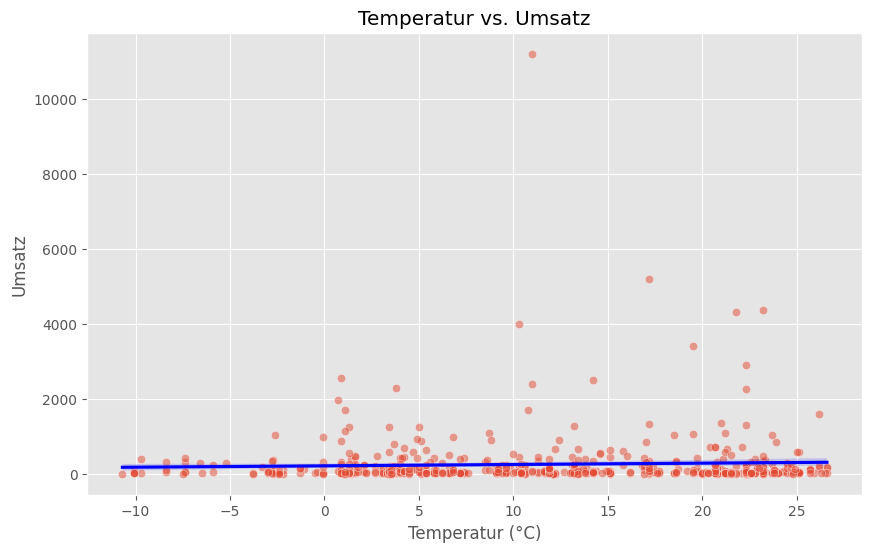

In [136]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='Sales', data=df_merged, alpha=0.5)

sns.regplot(x='temp', y='Sales', data=df_merged, scatter=False, color='blue', label="Trendlinie")

plt.title('Temperatur vs. Umsatz')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Umsatz')
plt.show()

## 🌍 7. Umsatz für New York nach Wetterbedingungen
Wir untersuchen ob New York wetterabhängig höhere Verkäufe hat.

In [138]:
df_merged.info()
df_merged.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 332 to 56
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  563 non-null    object 
 1   City        563 non-null    object 
 2   Sales       563 non-null    float64
 3   Profit      563 non-null    float64
 4   time        563 non-null    object 
 5   temp        563 non-null    float64
 6   cloud       563 non-null    float64
 7   weather     563 non-null    object 
dtypes: float64(4), object(4)
memory usage: 55.8+ KB


,Order Date,City,Sales,Profit,time,temp,cloud,weather
35,2017-12-28,New York City,14.850,4.0095,2017-12-28,-10.1,21.0,sunny
201,2017-12-29,New York City,6.030,2.9547,2017-12-29,-10.7,0.0,sunny
58,2017-12-30,New York City,52.776,19.7910,2017-12-30,-8.4,4.0,sunny
57,2017-12-30,New York City,90.930,2.7279,2017-12-30,-8.4,4.0,sunny
56,2017-12-30,New York City,323.136,12.1176,2017-12-30,-8.4,4.0,sunny


             Sales      Profit
weather                       
cloudy   60170.709  15648.4801
sunny    81592.990  19111.8173


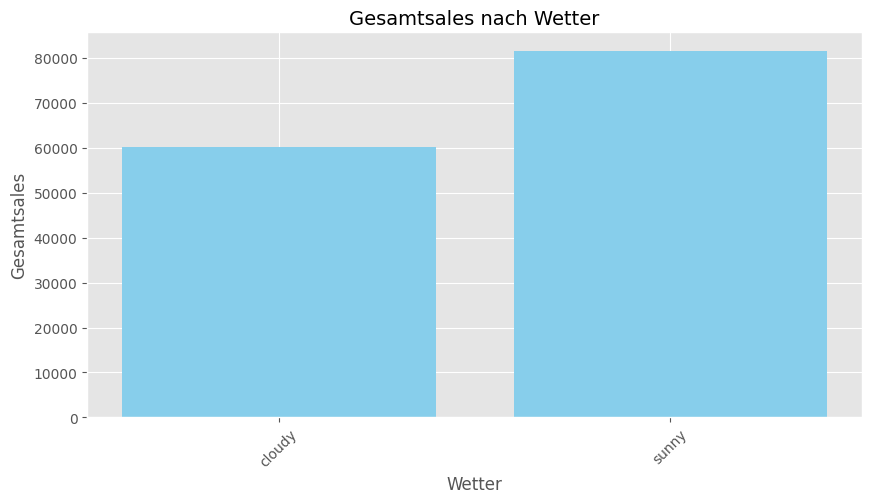

In [139]:
# Sicherstellen, dass Sales numerisch ist
df_merged['Sales'] = df_merged['Sales'].astype(float)

# Group by 'weather' und Sales summieren
df_sales_by_weather = df_merged.groupby('weather')[['Sales','Profit']].sum()

print(df_sales_by_weather.head())

# Balkendiagramm erstellen
plt.figure(figsize=(10, 5))
plt.bar(df_sales_by_weather.index, df_sales_by_weather['Sales'], color='skyblue')

# Titel und Achsenbeschriftungen
plt.title("Gesamtsales nach Wetter", fontsize=14)
plt.xlabel("Wetter", fontsize=12)
plt.ylabel("Gesamtsales", fontsize=12)

# X-Achsenbeschriftung verbessern
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.show()

## Gesamtprofit nach Wetter

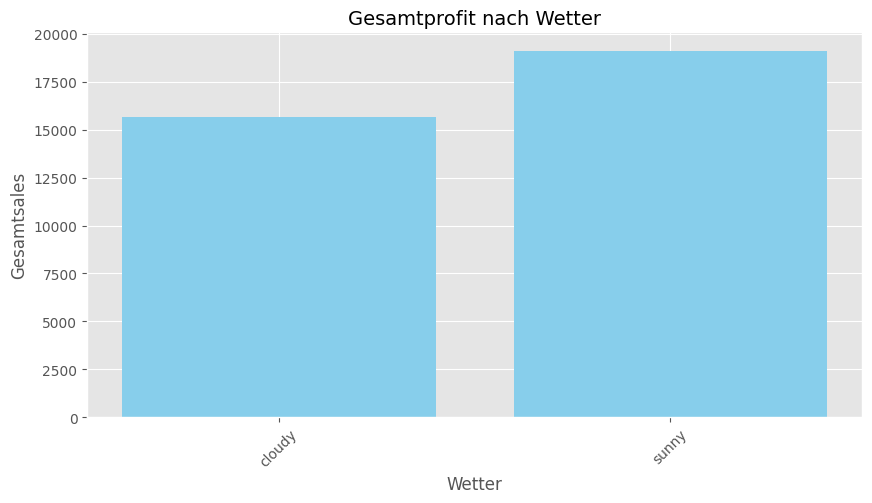

In [140]:
# Balkendiagramm mit Profit erstellen
plt.figure(figsize=(10, 5))
plt.bar(df_sales_by_weather.index, df_sales_by_weather['Profit'], color='skyblue')

# Titel und Achsenbeschriftungen
plt.title("Gesamtprofit nach Wetter", fontsize=14)
plt.xlabel("Wetter", fontsize=12)
plt.ylabel("Gesamtsales", fontsize=12)

# X-Achsenbeschriftung verbessern
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.show()

## Umsatz und Profit im Vergleich

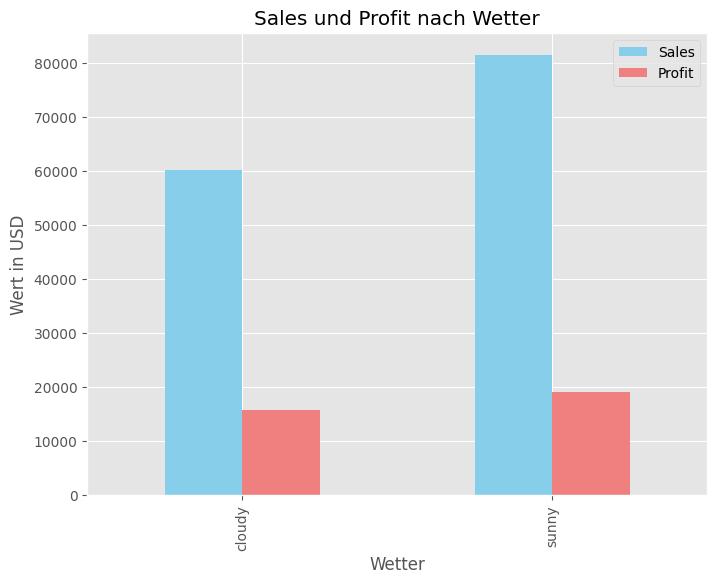

In [114]:
# Balkendiagramm direkt aus dem DataFrame plotten
df_sales_by_weather.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightcoral'])

# Titel und Achsenbeschriftungen
plt.title("Sales und Profit nach Wetter")
plt.xlabel("Wetter")
plt.ylabel("Wert in USD")

# Gitter für bessere Lesbarkeit
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()
